In [5]:
# read clean data with default info
import pandas as pd
import numpy as np

data = pd.read_csv("cleaned_data.csv")

C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2723: DtypeWarning: Columns (127,128,129,1212) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
# delete column if over 90% are the same or nan
row_num = data.shape[0]
for col_name in data.columns.tolist():
    non_nan = data.loc[:, col_name].count()
    if non_nan < row_num * 0.9:
        data = data.drop(col_name, 1)
# delete non meaningful column( for example: "analyticsmatchkey")
data = data.drop('analyticsmatchkey', 1)

print("Total size after cleaning ", data.shape)
print("good size = ", data.loc[data.loc[:, 'default'] == 0, :].shape)
print("bad size = ", data.loc[data.loc[:, 'default'] == 1, :].shape)

# delete all column with string data type
for col_name in data.columns.tolist():
    if data.loc[:, col_name].dtype == 'object':
        data = data.drop(col_name, 1)
# clean all row with nan value
data.dropna(inplace=True)
# seperate for training data and testing data
train_data = data.sample(frac=0.7)
train_data.sort_index(inplace=True)
test_data = data[~data.index.isin(train_data.index)]
print("Number of training data = ", len(train_data))
print("Nuber of testing data = ", len(test_data))

Total size after cleaning  (4972, 1070)
good size =  (3167, 1070)
bad size =  (1805, 1070)
Number of training data =  3174
Nuber of testing data =  1361


In [8]:
# try different C in logistic regression to find the best coefficient
import matplotlib.pyplot as plt
from sklearn import linear_model, datasets
c = [0.0001, 0.001, 0.01, 0.1, 1, 10, 20, 50, 100, 200, 500, 1000]
score_set = np.zeros((2, len(c)))
X = train_data.iloc[:, :-1]
Y = train_data.iloc[:, -1]

i = 0
for element in c:
    logreg = linear_model.LogisticRegression(C=element, penalty='l2')
    logreg.fit(X, Y)
    score_set[0, i] = logreg.score(X, Y)
    score_set[1, i] = logreg.score(test_data.iloc[:, :-1], test_data.iloc[:, -1])
    i = i + 1

[[ 0.74669187  0.74984247  0.73251418  0.71865154  0.71266541  0.71770636
   0.74480151  0.7331443   0.73093888  0.74637681  0.71077505  0.74007561]
 [ 0.66274798  0.66274798  0.66054372  0.65613519  0.66201323  0.65613519
   0.65980896  0.6576047   0.6576047   0.66495224  0.66495224  0.66127847]]


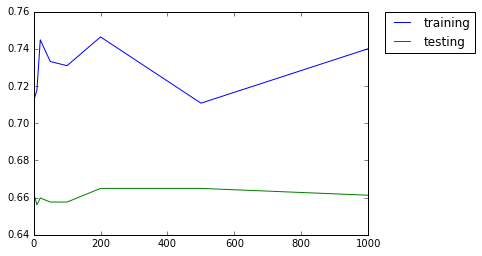

In [9]:
%matplotlib inline
print(score_set)
plt.plot(c, score_set[0, :], label='training')
plt.plot(c, score_set[1, :], label='testing')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()